 <img src="https://eant.tech/imagenes/logo.png" width=25% height=80%  >

## <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Reseñas sobre vinos 🍷🍇

Vamos a realizar un analisis sobre 130k reseñas de vinos con variedad, ubicación, bodega, precio y descripción.
Los datos fueron extraídos de WineEnthusiast durante la semana del 15 de junio de 2017. 

<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSe4lVE59hkaPNy660EmCcv3RtacGOl-PUBow&usqp=CAU" width="80%">

### Variables

Nombre | Descripción
---|---
Unnamed: 0 | Una variable sin nombre y una variable que especifica índices.
country | Variable que indica los países de los vinos.
description | Variable con descripciones sobre vinos.
designation | Nombres de vino.
points |  Puntajes de vinos. (mínimo = 80, máximo = 100)
price | Precios de los vinos.
province | La variable que indica la ciudad donde se ubican los vinos en el país.
region_1 | Región de la provincia.
region_2 | Región de la provincia.
variety | Variedades de uva.
winery | Nombres de bodegas.

In [1]:
import pandas as pd

🔹 1. Importar el dataset denominado **winemag-data_first150k.csv** 

In [2]:
winemag = pd.read_csv('./data/winemag-data_first150k.csv', index_col=0)

🔹 2. Imprimir los nombres de las columnas

In [3]:
winemag.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

🔹 3. Eliminar la primera columna **'Unnamed: 0'**

In [4]:
# ya hecho con el argumento index_col

🔹 4. Imprimir la estructura del dataset

In [5]:
winemag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


🔹 5. Imprimir la cantidad de filas y columnas del dataset

In [6]:
winemag.shape

(150930, 10)

🔹 6. Verificar si el dataset contiene valores nulos en algunas de sus columnas

In [7]:
winemag.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

🔹 7. Generar un dataframe con las observaciones que contienen valores nulos en la variable Country.
Cuantas observaciones contiene el dataframe?

🔹 8. Cuantos valores unicos de puntaje hay?

In [8]:
winemag.points.unique()

array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  81, 100,  99,  98,  97,  80], dtype=int64)

🔹 9. Imprimr una serie que contenga el recuento para la variable points 

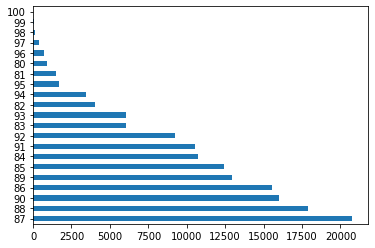

In [9]:
import matplotlib.pyplot as plt
winemag.points.value_counts().plot(kind='barh')
plt.show()

🔹 10. Generar una nueva variable denominada `points_range`que contenga los siguientes valores:
* 80-86
* 87-90
* 90-100

In [10]:
bins = [79,86,90,100]
labels = ['80-86','87-90','90-100'] 
winemag['pts_range'] = pd.cut(winemag.points, bins=bins, labels=labels)

🔹 11. Imprimr una serie que contenga el recuento para la variable points_range 



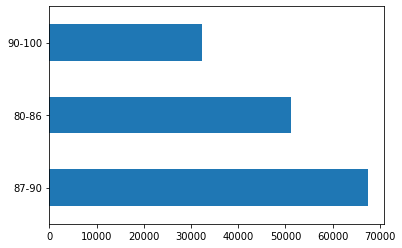

In [11]:
winemag.pts_range.value_counts().plot(kind='barh')
plt.show()

🔹 12. Generar un dataset que contenga las siguientes columnas:
* points_range
* cantidad
* price_mean: promedio de precio
* porcentaje: cantidad/sum(cantidad)

In [12]:
wines = winemag.groupby('pts_range').count()[['winery']].rename(columns={"winery": "cantidad"})
wines['avg_price'] = winemag.groupby('pts_range')['price'].mean()
wines['%'] = winemag.groupby('pts_range')['winery'].count() * 100 / winemag.shape[0]

wines

,cantidad,avg_price,%
pts_range,,,
80-86,51181,19.992484,33.910422
87-90,67512,29.960456,44.730670
90-100,32237,62.593910,21.358908


🔹 13. Generar un dataframe agrupado por pais que tenga el precio maximo, minimo, cantidad y promedio:

In [13]:
countries = winemag.groupby('country').count()[['winery']].rename(columns={"winery": "cantidad"})
countries['%'] = winemag.groupby('country')['winery'].count() * 100 / winemag.shape[0]
countries['max_price'] = winemag.groupby('country')['price'].max()
countries['min_price'] = winemag.groupby('country')['price'].min()

# print del top 10 en funcion a la cantidad
countries.nlargest(10, 'cantidad')

,cantidad,%,max_price,min_price
country,,,,
US,62397,41.341682,2013.0,4.0
Italy,23478,15.555556,900.0,5.0
France,21098,13.978666,2300.0,5.0
Spain,8268,5.478036,770.0,4.0
Chile,5816,3.853442,400.0,5.0
Argentina,5631,3.730869,250.0,4.0
Portugal,5322,3.526138,980.0,4.0
Australia,4957,3.284304,850.0,5.0
New Zealand,3320,2.199695,125.0,7.0


🔹 14. Generar una nueva columna en el dataframe que se denomine **len_description**, que contenga el largo de las descripciones

In [14]:
winemag['desc_len'] = winemag['description'].map(lambda x: len(x))

descriptions = winemag.groupby(['country','province'])['desc_len'].mean()
descriptions

country    province        
Albania    Mirditë             221.000000
Argentina  Mendoza Province    260.281527
           Other               253.284589
Australia  Australia Other     216.408680
           New South Wales     262.414634
                                  ...    
Uruguay    Juanico             266.684211
           Montevideo          287.000000
           Progreso            275.800000
           San Jose            256.533333
           Uruguay             226.555556
Name: desc_len, Length: 455, dtype: float64

🔹 15. Generar un dataframe agrupado por pais y provincia, que contenga el promedio del largo de las descripciones

In [15]:
# hecho en la celda anterior

🔹 16. Cuales son los 3 paises que tienen los vinos con mejor y peor puntaje promedio?

In [16]:
prom = pd.DataFrame(winemag.groupby('country')['points'].mean()).rename(columns={"points":'pts_avg'})

prom.nlargest(3,'pts_avg')

,pts_avg
country,
England,92.888889
Austria,89.276742
France,88.925870


In [17]:
prom.nsmallest(3,'pts_avg')

,pts_avg
country,
South Korea,81.5
China,82.0
Montenegro,82.0
